## **Mask R-CNN - BEP Model**

### **Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import tensorflow as tf # type: ignore
import matplotlib.pyplot as plt # type: ignore
import random

ROOT_DIR = os.path.abspath("../")

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib

%matplotlib inline 

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [2]:
%load_ext autoreload
%autoreload 2
import bep_data
import bep_utils

### **Configurations**

In [3]:
import tdmcoco
config = tdmcoco.CocoConfig()


class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3  # thin, few, thick
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

### **Load data**

In [4]:
bep_utils.check_dir_setup(ROOT_DIR, 0.7)

train = bep_data.bepDataset()
train.load_dir(os.path.join(ROOT_DIR, 'data'), 'train', reload_annotations=True)
train.prepare()

original = bep_data.bepDataset()
original.load_dir(os.path.join(ROOT_DIR, 'data'), 'test', reload_annotations=True)
original.prepare()


print("Train images: {} | Classes: {}".format(len(train.image_ids), train.class_names))
print("Original images: {} | Classes: {}".format(len(original.image_ids), original.class_names))

Directory setup correctly
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Train images: 14 | Classes: ['BG', 'Mono_Graphene', 'Few_Graphene', 'Thick_Graphene']
Original images: 17 | Classes: ['BG', 'Mono_Graphene', 'Few_Graphene', 'Thick_Graphene']


### **Load Model for inference**

In [5]:
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', 'graphene_mask_rcnn_tdm_0120.h5')
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'DL_2DMaterials', 'ModelWeights_DL_2DMaterials', 'graphene_mask_rcnn_tdm_0120.h5')
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', 'ensemble_mask_rcnn_tdm_0120.h5')

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

weights_path = COCO_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()

print("Loading weights ", weights_path)

# For the graphene weights
model.load_weights(weights_path, by_name=True)

# For the ensemble weights
# model.load_weights(weights_path, by_name=True, exclude=[
#                 "mrcnn_class_logits", "mrcnn_bbox_fc",
#                 "mrcnn_bbox", "mrcnn_mask"])

Instructions for updating:
Use fn_output_signature instead
Loading weights  c:\Users\abell\Documents\aa_delft\J4\BEP\ai\DL_2DMaterials\ModelWeights_DL_2DMaterials\graphene_mask_rcnn_tdm_0120.h5


### **Run Model**

image ID: ali.9 (8) 
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  248.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  124.30000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 

gt_class_id              shape: (5,)                  min:    3.00000  max:    3.00000  int32
gt_bbox                  shape: (5, 4)                min:  473.00000  max:  595.00000  int32
gt_mask                  shape: (1024, 1024, 5)       min:    0.00000  max:    1.00000  bool


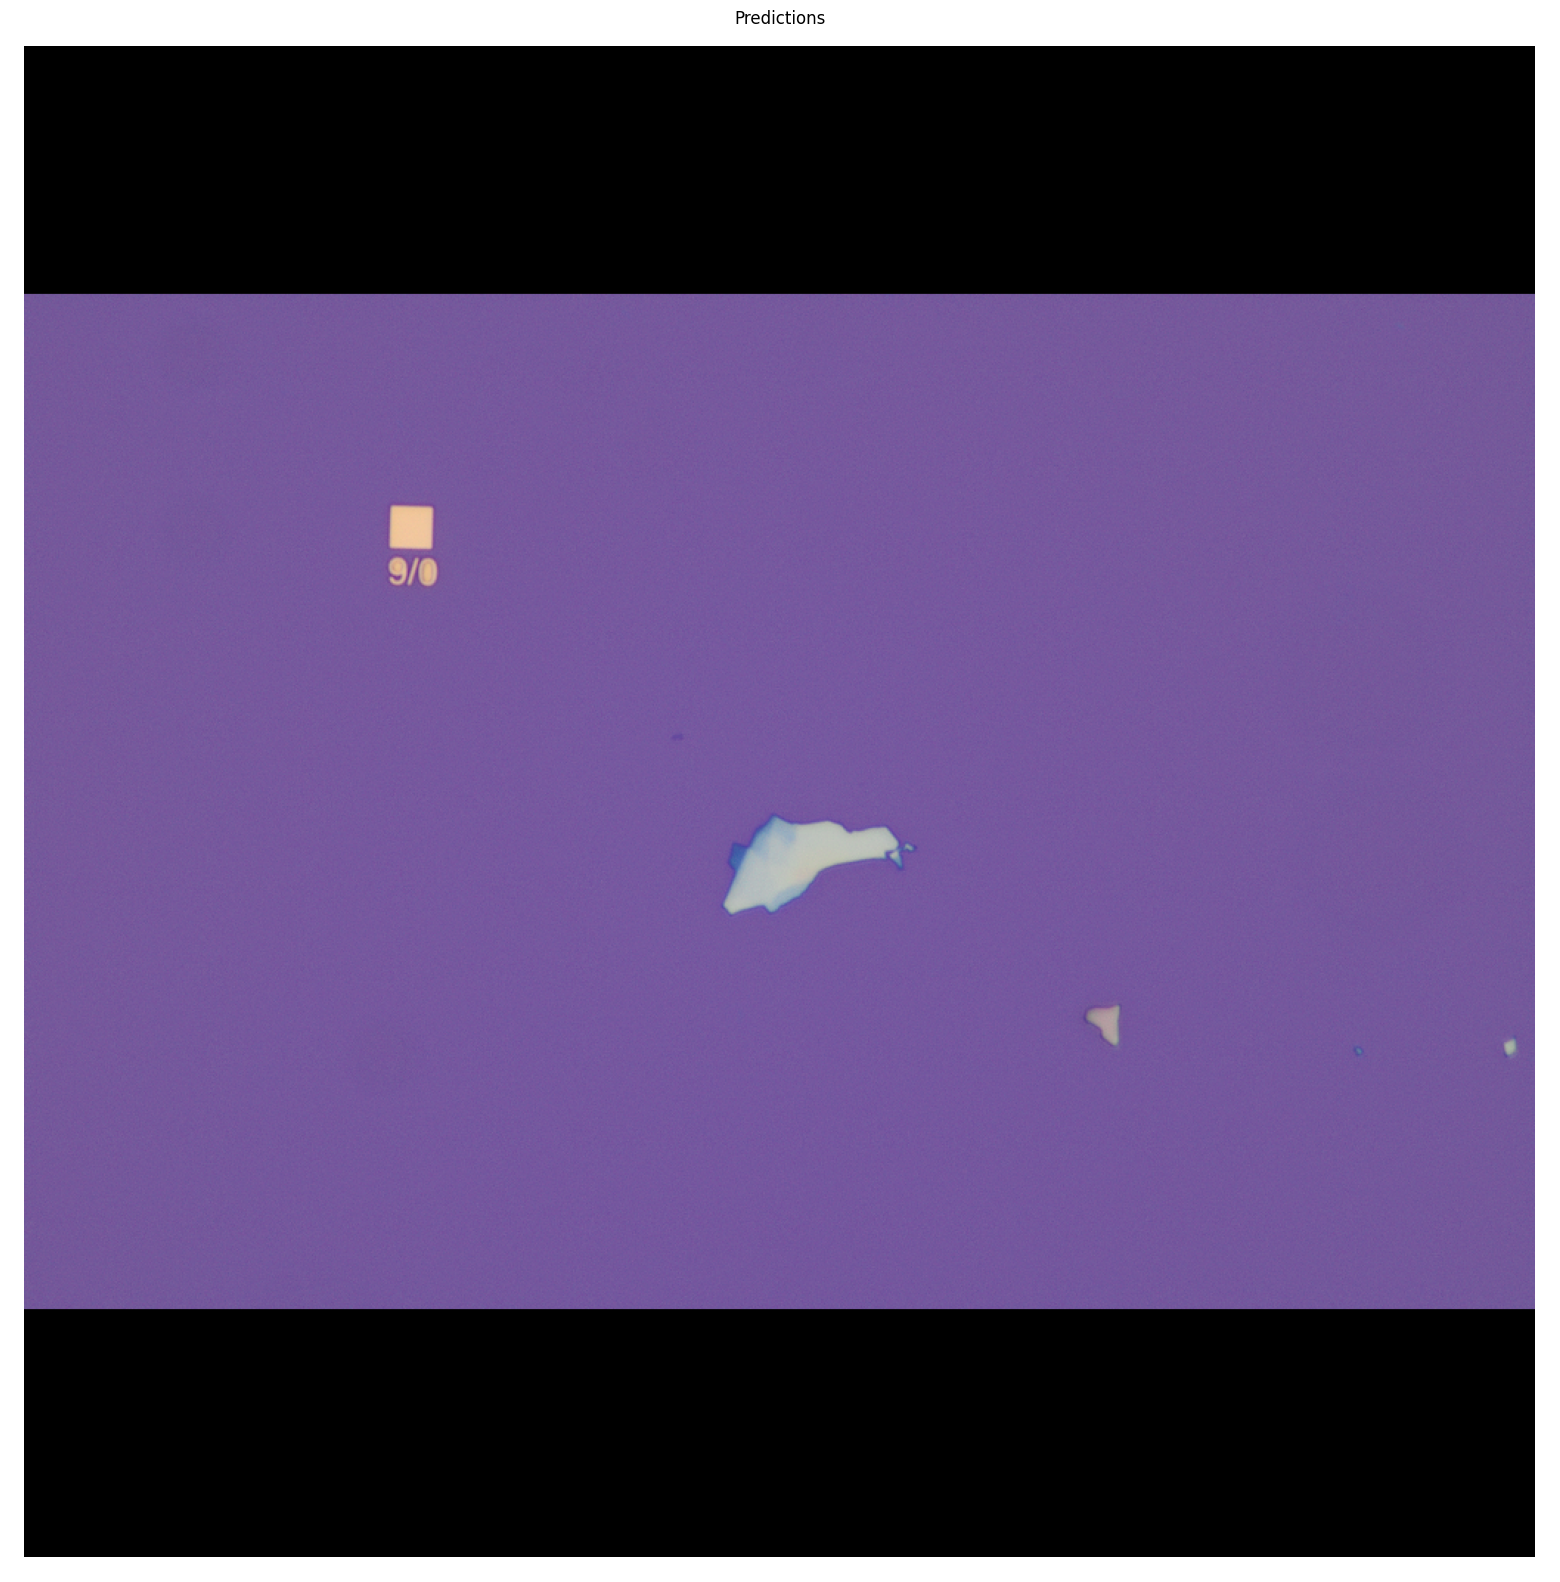

In [13]:
rm = bep_utils.runModel(model, config, dataset=train)
rm.run(image_idx=8)

### Ground Truth

image_id:  8 
Original shape:  (2076, 3088, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  248.00000  uint8
mask                     shape: (1024, 1024, 5)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (5,)                  min:    3.00000  max:    3.00000  int32
[3 3 3 3 3]
bbox                     shape: (5, 4)                min:  473.00000  max:  595.00000  int32


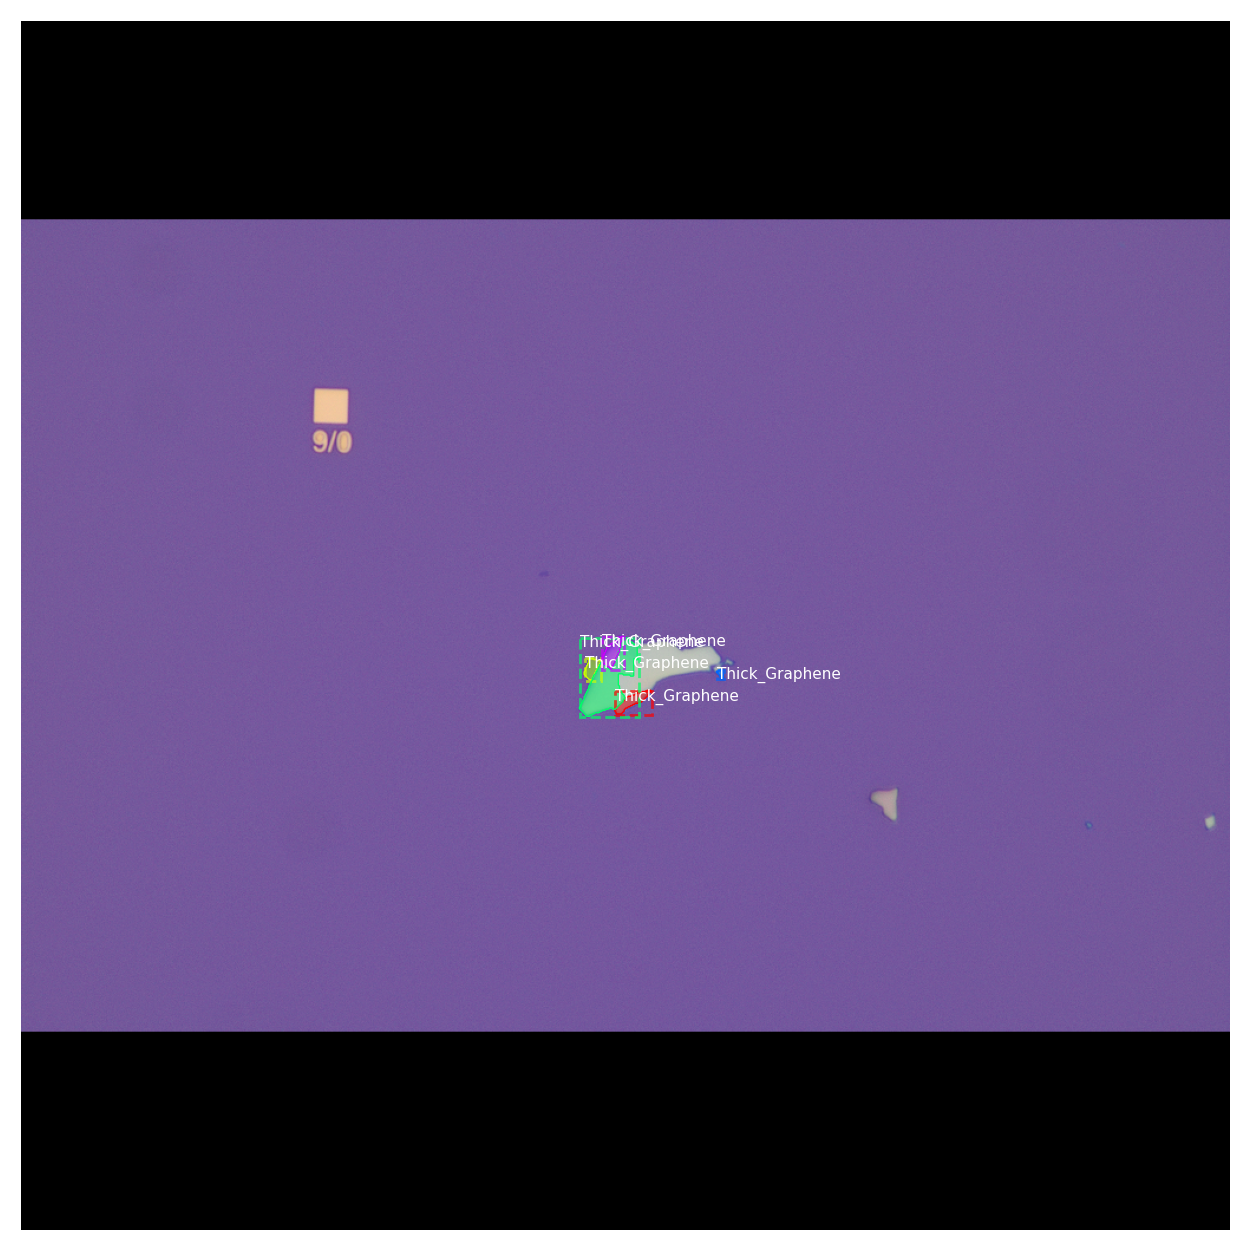

In [8]:
rm.gt()